Dropout is a common and effective regularisation technique

A fraction ('the dropout rate') of the output from a drop-out layer is zero'd

The third overfitting antidote is 'dropout'. It is a common and effective regularisation technique. A fraction ('the dropout rate') of the output from a drop-out layer is zero'd.

In [1]:
import numpy as np

# dropout rate = 0.5
length = 10
mask = np.random.randint(0, high = 2, size = length) 
print('mask = ', mask)

# layer output
layer_out = np.random.rand(length)
print('layer_out =\n', layer_out)
 
# regularised layer output 
print('mask * layer_out =\n', mask * layer_out) 

mask =  [1 0 1 1 1 1 0 1 0 0]
layer_out =
 [0.89300318 0.57162004 0.6188812  0.52188345 0.9574894  0.38338643
 0.59287561 0.45997076 0.62277837 0.9153147 ]
mask * layer_out =
 [0.89300318 0.         0.6188812  0.52188345 0.9574894  0.38338643
 0.         0.45997076 0.         0.        ]


Mask is a vector with, on average, equal numbers of zeros and ones. Dropout is implemented by multiplying the layer output by the mask.

The dropout rate is usually between 0.2 and 0.5

Dropout is removed while evaluating the final network

The output layers of the final network need to be scaled down by the dropout rate

The dropout rate is usually berween 0.2 and 0.5. Dropout is removed while evaluating the final network. The output layers of the final network need to be scaled down by the dropout rate because one half of the layer output was effectively removed during training: the layer outputs will be twice as large when the network is restored to its full size and applied to the test set.

Alternatively, scale the layer outputs up during training to compensate for the zero'd elements:
```
layer_output *= np.random.random(0, high = 2, size = layer_output.shape)
layer_output /= 0.5
```

TensorFlow applies this scaling automatically.

Alternatively, scale the layer output up during training to compensate for tensor element zeroing. TensorFlow applies this scaling automatically.

In [2]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Let's try dropout on the IMDB network. Download and vectorise data. 

In [3]:
from tensorflow.keras import models, layers

def build_model(layer_1_units, layer_2_units, layer_3_units, drop):
    model = models.Sequential()
    
    model.add(layers.Dense(layer_1_units, activation='relu', input_shape=(10000,)))
    if(drop):
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(layer_2_units, activation='relu'))
    if(drop):
        model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(layer_3_units, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

A model building function with optional 50% dropout.

In [4]:
import tensorflow as tf
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c = ['\b|', '\b/', '\b-', '\b\\'] 
        print(c[epoch % 4], end='')
    def on_epoch_end(self, epoch, logs=None):
        print('\b', end='')

Our call back spinner.

In [5]:
model = build_model(16, 16, 1, drop=False)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0,
                    callbacks=[CustomCallback()])

Train the original network.

In [6]:
do_model = build_model(16, 16, 1, drop=True)
do_history = do_model.fit(partial_x_train,
                          partial_y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_val, y_val),
                          verbose=0, 
                          callbacks=[CustomCallback()])

Train a network with dropout.

In [7]:
import matplotlib.pyplot as plt
    
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label):

    epochs = range(1, len(loss_a) + 1)

    plt.plot(epochs, loss_a, 'b+', label = label_a)
    plt.plot(epochs, loss_b, 'bo', label = label_b)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

A loss comparison plot function.

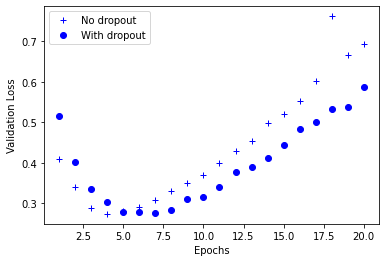

In [8]:
plot_loss_comparison(history.history['val_loss'], 'No dropout', 
                     do_history.history['val_loss'], 'With dropout', 'Validation Loss')

The plot show that dropout has successfully reduced overfitting

Dropout was (re-) discovered by Geoffrey Hinton

Hinton says: 'I went to the bank. The tellers kept changing and I asked one of them why. He said he didn't know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud a bank. This made me realise that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.'

Dropout was (re-) discovered by Geoffrey Hinton

Hinton says: 'I went to the bank. The tellers kept changing and I asked one of them why. He said he didn't know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud a bank. This made me realise that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.'